In [34]:
import numpy as np
import pandas as pd
from pydataset import data
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Attendance Data
Load the attendance.csv file and calculate an attendance percentage for each student. One half day is worth 50% of a full day, and 10 tardies is equal to one absence.

In [10]:
#load attendance.csv file
df = pd.read_csv('untidy-data/attendance.csv')
df

,Unnamed: 0,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [13]:
#calculate an attendance percentage for each student. 
#One half day (H) is worth 50% of a full day, 
#and 10 tardies (T) is equal to one absence.
def get_attendance(letter):
    if letter == 'P': #present
        return 1
    elif letter == 'T': #tardy (meaning present for .9)
        return 0.9
    elif letter == 'H': #half day
        return 0.5
    else:
        return 0 #if letter == 'A' for absent

In [14]:
#tidy data by renaming col, melting cols, and adding attendance percentage
#rename first col to 'name' 

df = df.rename(columns={'Unnamed: 0': 'name'})
# or df = df.rename(columns={df.columns[0]: 'name'})

df.head()

,name,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08
0,Sally,P,T,T,H,P,A,T,T
1,Jane,A,P,T,T,T,T,A,T
2,Billy,A,T,A,A,H,T,P,T
3,John,P,T,H,P,P,T,P,P


In [15]:
#and melt 'date' cols
df = df.melt(id_vars='name', var_name='date', value_name='letter')

df.head()

,name,date,letter
0,Sally,2018-01-01,P
1,Jane,2018-01-01,A
2,Billy,2018-01-01,A
3,John,2018-01-01,P
4,Sally,2018-01-02,T


In [16]:
#add attendance col
df['grade'] = df.letter.apply(get_attendance)
df.head()

,name,date,letter,grade
0,Sally,2018-01-01,P,1.0
1,Jane,2018-01-01,A,0.0
2,Billy,2018-01-01,A,0.0
3,John,2018-01-01,P,1.0
4,Sally,2018-01-02,T,0.9


In [17]:
#attendance percentage for each student
df.groupby('name').grade.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

In [18]:
#another way
df1 = df.replace({'P': 1, 'A': 0, 'H': 0.5, 'T': 0.9})


#groupby student and find mean of 'value'
df1.groupby('name').grade.mean()

name
Billy    0.5250
Jane     0.6875
John     0.9125
Sally    0.7625
Name: grade, dtype: float64

## 2. Coffee Levels

- a. Read the coffee_levels.csv file.
- b. Transform the data so that each carafe is in it's own column.
- c. Is this the best shape for the data?

In [20]:
#read coffee levels csv file
coffee = pd.read_csv('untidy-data/coffee_levels.csv')
coffee.head()

,hour,coffee_carafe,coffee_amount
0,8,x,0.816164
1,9,x,0.451018
2,10,x,0.843279
3,11,x,0.335533
4,12,x,0.898291


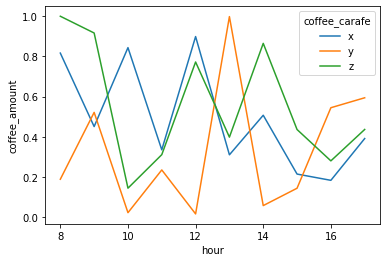

In [21]:
#plot data
sns.lineplot(x = 'hour',
             y = 'coffee_amount',
             data = coffee,
             hue = 'coffee_carafe');

In [22]:
#transform so that each carafe is in it's own col
coffee_clean = coffee.pivot_table(index='hour', 
                                  columns='coffee_carafe', 
                                 values='coffee_amount')
coffee_clean

coffee_carafe,x,y,z
hour,,,
8,0.816164,0.189297,0.999264
9,0.451018,0.521502,0.915990
10,0.843279,0.023163,0.144928
11,0.335533,0.235529,0.311495
12,0.898291,0.017009,0.771947
13,0.310711,0.997464,0.398520
14,0.507288,0.058361,0.864464
15,0.215043,0.144644,0.436364
16,0.183891,0.544676,0.280621


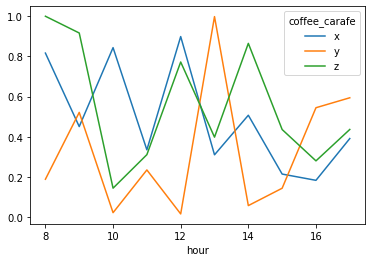

In [23]:
#Is this the best shape for the data?
#Yes. It's cleaner and easier to read
#data already tidy, but this new shape also works

#tidy data is easier to plot:
coffee_clean.plot();

## 3. Cake Recipes

- a. Read the cake_recipes.csv data. This data set contains cake tastiness scores for combinations of different recipes, oven rack positions, and oven temperatures.
- b. Tidy the data as necessary.
- c. Which recipe, on average, is the best? recipe b
- d. Which oven temperature, on average, produces the best results? 275
- e. Which combination of recipe, rack position, and temperature gives the best result? recipe b, bottom rack, 300 degrees

In [48]:
# Read the cake_recipes.csv data.
#This data set contains cake tastiness scores for combinations of different
#recipes, oven rack positions, and oven temperatures.
cakes = pd.read_csv('untidy-data/cake_recipes.csv')
cakes

,recipe:position,225,250,275,300
0,a:bottom,61.738655,53.912627,74.414730,98.786784
1,a:top,51.709751,52.009735,68.576858,50.228470
2,b:bottom,57.095320,61.904369,61.196980,99.248541
3,b:top,82.455004,95.224151,98.594881,58.169349
4,c:bottom,96.470207,52.001358,92.893227,65.473084
5,c:top,71.306308,82.795477,92.098049,53.960273
6,d:bottom,52.799753,58.670419,51.747686,56.183110
7,d:top,96.873178,76.101363,59.571620,50.971626


In [49]:
#Tidy the data as necessary

In [52]:
#make 2 new cols for recipe and position
cakes['recipe:position']

0    a:bottom
1       a:top
2    b:bottom
3       b:top
4    c:bottom
5       c:top
6    d:bottom
7       d:top
Name: recipe:position, dtype: object

In [53]:
#split at the colon
cakes['recipe:position'].str.split(':')

0    [a, bottom]
1       [a, top]
2    [b, bottom]
3       [b, top]
4    [c, bottom]
5       [c, top]
6    [d, bottom]
7       [d, top]
Name: recipe:position, dtype: object

In [54]:
#to extract
cakes['recipe:position'].str.split(':', expand=True)

,0,1
0,a,bottom
1,a,top
2,b,bottom
3,b,top
4,c,bottom
5,c,top
6,d,bottom
7,d,top


In [55]:
#add separated columns
cakes[['recipe', 'position']]=cakes['recipe:position'].str.split(':', expand=True)
cakes

,recipe:position,225,250,275,300,recipe,position
0,a:bottom,61.738655,53.912627,74.414730,98.786784,a,bottom
1,a:top,51.709751,52.009735,68.576858,50.228470,a,top
2,b:bottom,57.095320,61.904369,61.196980,99.248541,b,bottom
3,b:top,82.455004,95.224151,98.594881,58.169349,b,top
4,c:bottom,96.470207,52.001358,92.893227,65.473084,c,bottom
5,c:top,71.306308,82.795477,92.098049,53.960273,c,top
6,d:bottom,52.799753,58.670419,51.747686,56.183110,d,bottom
7,d:top,96.873178,76.101363,59.571620,50.971626,d,top


In [58]:
#drop old column
cakes.drop(columns='recipe:position', inplace=True)
cakes

KeyError: "['recipe:position'] not found in axis"

In [59]:
#get oven temps into single col by melting data
cakes = cakes.melt(id_vars=['recipe', 'position'], 
                   var_name='temp', 
                   value_name='tastiness_score')

cakes

,recipe,position,temp,tastiness_score
0,a,bottom,225,61.738655
1,a,top,225,51.709751
2,b,bottom,225,57.095320
3,b,top,225,82.455004
4,c,bottom,225,96.470207
5,c,top,225,71.306308
6,d,bottom,225,52.799753
7,d,top,225,96.873178
8,a,bottom,250,53.912627
9,a,top,250,52.009735


In [60]:
#Which recipe, on average, is the best? 
#recipe b

cakes.groupby('recipe').tastiness_score.mean()

recipe
a    63.922201
b    76.736074
c    75.874748
d    62.864844
Name: tastiness_score, dtype: float64

In [61]:
print('The best recipe on average is:',cakes.groupby('recipe')['tastiness_score'].mean().idxmax())

The best recipe on average is: b


In [62]:
best_recipe = cakes.groupby(['recipe']).tastiness_score.mean().idxmax()
best_score = cakes.groupby(['recipe']).tastiness_score.mean().max()
print(f' The best recipe is \'{best_recipe}\' with score of {round(best_score, 1)}')

 The best recipe is 'b' with score of 76.7


In [63]:
#Which oven temperature, on average, produces the best results? 
#275

cakes.groupby('temp').tastiness_score.mean()

temp
225    71.306022
250    66.577437
275    74.886754
300    66.627655
Name: tastiness_score, dtype: float64

In [64]:
print('The best oven temp on average is:',cakes.groupby('temp')['tastiness_score'].mean().idxmax())

The best oven temp on average is: 275


In [65]:
best_temp = cakes.groupby(['temp']).tastiness_score.mean().idxmax()
best_score = cakes.groupby(['temp']).tastiness_score.mean().max()
print(f' The best temperature is \'{best_temp}F\' with score of {round(best_score, 1)}')

 The best temperature is '275F' with score of 74.9


In [66]:
#Which combination of recipe, rack position, and temperature gives the best result? 
#recipe b, bottom rack, 300 degrees

cakes.sort_values(by='tastiness_score').tail(1)

,recipe,position,temp,tastiness_score
26,b,bottom,300,99.248541


In [67]:
print("The best combination of recipe, rack position, and temperature based on tastiness score is: ")

cakes[cakes.tastiness_score == cakes.tastiness_score.max()]

The best combination of recipe, rack position, and temperature based on tastiness score is: 


,recipe,position,temp,tastiness_score
26,b,bottom,300,99.248541


In [69]:
cakes.groupby(['temp', 'recipe', 'position']).tastiness_score.mean()

temp  recipe  position
225   a       bottom      61.738655
              top         51.709751
      b       bottom      57.095320
              top         82.455004
      c       bottom      96.470207
              top         71.306308
      d       bottom      52.799753
              top         96.873178
250   a       bottom      53.912627
              top         52.009735
      b       bottom      61.904369
              top         95.224151
      c       bottom      52.001358
              top         82.795477
      d       bottom      58.670419
              top         76.101363
275   a       bottom      74.414730
              top         68.576858
      b       bottom      61.196980
              top         98.594881
      c       bottom      92.893227
              top         92.098049
      d       bottom      51.747686
              top         59.571620
300   a       bottom      98.786784
              top         50.228470
      b       bottom      99.248541
     

In [70]:
best_comb = cakes.groupby(['temp', 'recipe', 'position']).tastiness_score.mean().idxmax()
best_score = cakes.groupby(['temp', 'recipe', 'position']).tastiness_score.mean().max()
print(f'The best combination is \'{best_comb}\' with score of {round(best_score, 1)}')

The best combination is '('300', 'b', 'bottom')' with score of 99.2
